# Praktikum Modul 3: Customer Segmentation

**Nama:** Taufik Satria Nugraha  
**Universitas:** Universitas Jenderal Soedirman

## Pendahuluan

Praktikum Modul 3 ini fokus pada Customer Segmentation, yang merupakan teknik analisis data yang penting dalam strategi pemasaran dan pengembangan bisnis. Dalam praktikum ini, kami akan melakukan serangkaian tugas yang mencakup eksplorasi data, clustering menggunakan algoritma K-Means, dan profil hasil cluster.



## Deskripsi Data

Data yang digunakan dalam praktikum ini adalah dataset pelanggan yang berisi informasi berikut:

- MemberID: ID pelanggan
- NoChild: Jumlah anak
- tenure_months: Jangka waktu pelanggan dalam bulan
- youngest_kid_age_join: Usia anak termuda ketika bergabung
- recency: Frekuensi pembelian dalam bulan terakhir
- frequency: Frekuensi pembelian rata-rata
- avg_monthly_frequency: Rata-rata frekuensi pembelian bulanan
- monetary: Total nilai pembelian
- avg_monetary: Rata-rata nilai pembelian
- avg_interpurchase: Rata-rata jangka waktu antara pembelian
- freq_last3mo: Frekuensi pembelian dalam 3 bulan terakhir
- avg_consumption: Rata-rata konsumsi bulanan

## Tugas Praktikum

1. **Eksplorasi Data:** Melakukan eksplorasi data untuk memahami karakteristik dataset, melihat statistik deskriptif, dan mengidentifikasi pola-pola awal.

2. **Clustering K-Means (Penentuan Klaster Optimal):** Menggunakan algoritma K-Means untuk melakukan klastering pelanggan. Menentukan jumlah klaster optimal menggunakan metode Elbow dan Silohouette.

3. **Profiling Hasil Cluster:** Menggambarkan profil dari masing-masing klaster, melihat perbedaan signifikan dalam fitur-fitur tertentu, dan memberikan interpretasi bisnis terhadap hasil klaster.

### Import Library

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Eskplorasi Data

In [76]:
dataset = pd.read_csv('customer_segmentation.csv', sep=',')

In [77]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24765 entries, 0 to 24764
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MemberID               24765 non-null  int64  
 1   NoChild                24765 non-null  int64  
 2   tenure_months          24765 non-null  float64
 3   youngest_kid_age_join  24765 non-null  float64
 4   recency                24765 non-null  float64
 5   frequency              24765 non-null  int64  
 6   avg_monthly_frequency  24765 non-null  float64
 7   monetary               24765 non-null  int64  
 8   avg_monetary           24765 non-null  float64
 9   avg_interpurchase      24765 non-null  float64
 10  freq_last3mo           24765 non-null  int64  
 11  avg_consumption        24765 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 2.3 MB


In [78]:
dataset

,MemberID,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption
0,1,3,41.232033,2.921287,47.576389,7,1.750000,4335,619.285714,13.166667,4,23.142857
1,33,1,27.728953,1.141684,84.400000,3,1.000000,962,320.666667,45.000000,1,14.000000
2,42,1,27.104723,1.051335,0.460417,5,1.666667,9462,1892.400000,44.250000,2,73.600000
3,416,2,48.985626,1.916496,14.079167,11,1.833333,4224,384.000000,15.000000,6,16.000000
4,784,1,36.106776,2.989733,16.530556,3,1.000000,541,180.333333,83.000000,1,9.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
24760,433895,1,5.585216,2.447639,9.472222,10,1.666667,2438,243.800000,17.222222,6,8.800000
24761,433896,1,5.585216,2.086242,0.354861,12,2.000000,5259,438.250000,14.909091,7,15.833333
24762,433899,1,5.519507,1.040383,14.548611,18,3.600000,4938,274.333333,7.588235,10,9.388889
24763,433903,1,5.585216,2.562628,59.552083,7,1.400000,3332,476.000000,16.000000,3,16.000000


In [79]:
# Untuk mengetahui lebih dalam mengenai data pada masing masing kolom
dataset.describe()

,MemberID,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption
count,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000,24765.000000
mean,218904.657702,1.205330,12.190863,1.919732,25.551306,6.672885,1.817512,2539.426004,422.625798,19.033789,3.923037,16.717858
std,124013.975548,0.533292,11.384625,1.190995,23.884979,6.129535,1.107815,2620.645410,348.977801,18.940966,3.652184,13.350360
min,1.000000,1.000000,0.032854,1.002053,0.015278,1.000000,1.000000,73.000000,71.285714,0.000000,1.000000,4.000000
25%,119607.000000,1.000000,3.646817,1.133470,6.276389,2.000000,1.000000,763.000000,229.000000,8.095238,1.000000,9.000000
50%,217561.000000,1.000000,8.542094,1.497604,17.199306,5.000000,1.500000,1894.000000,333.777778,15.142857,3.000000,14.000000
75%,324722.000000,1.000000,18.004107,2.228611,37.321528,9.000000,2.000000,3601.000000,498.466667,25.000000,5.000000,19.750000
max,433907.000000,8.000000,129.839836,11.915127,92.000000,152.000000,50.666667,101893.000000,9636.000000,179.000000,152.000000,384.000000


In [80]:
# Menghapus Kolom yang Tidak Digunakan karena buka data Numerik
dataset_cluster = dataset[['NoChild', 'tenure_months', 'youngest_kid_age_join', 'recency', 'frequency', 'avg_monthly_frequency', 'monetary', 'avg_monetary', 'avg_interpurchase', 'freq_last3mo', 'avg_consumption']]
dataset_cluster

,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption
0,3,41.232033,2.921287,47.576389,7,1.750000,4335,619.285714,13.166667,4,23.142857
1,1,27.728953,1.141684,84.400000,3,1.000000,962,320.666667,45.000000,1,14.000000
2,1,27.104723,1.051335,0.460417,5,1.666667,9462,1892.400000,44.250000,2,73.600000
3,2,48.985626,1.916496,14.079167,11,1.833333,4224,384.000000,15.000000,6,16.000000
4,1,36.106776,2.989733,16.530556,3,1.000000,541,180.333333,83.000000,1,9.333333
...,...,...,...,...,...,...,...,...,...,...,...
24760,1,5.585216,2.447639,9.472222,10,1.666667,2438,243.800000,17.222222,6,8.800000
24761,1,5.585216,2.086242,0.354861,12,2.000000,5259,438.250000,14.909091,7,15.833333
24762,1,5.519507,1.040383,14.548611,18,3.600000,4938,274.333333,7.588235,10,9.388889
24763,1,5.585216,2.562628,59.552083,7,1.400000,3332,476.000000,16.000000,3,16.000000


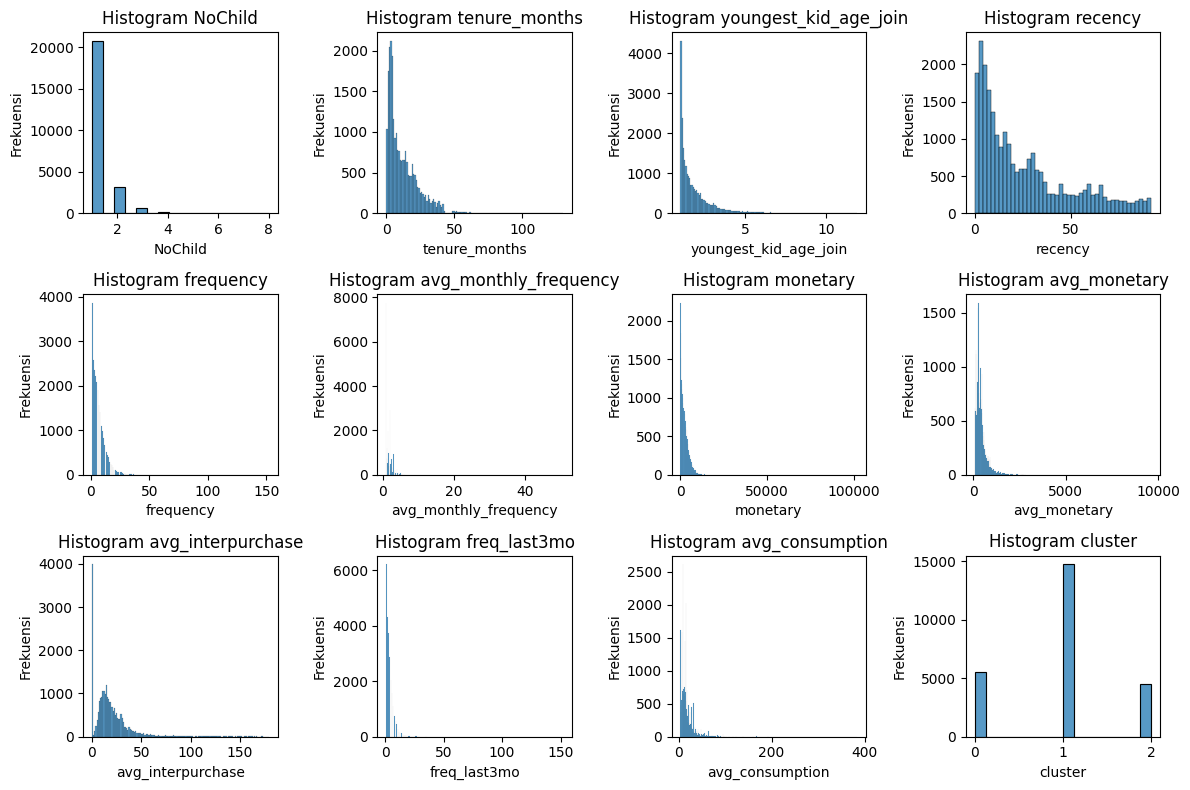

In [98]:
# Membuat Grafik Histogram Dari Setiap Kolom
columns_to_plot = dataset_cluster.columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for i, column in enumerate(columns_to_plot):
    sns.histplot(data=dataset_cluster, x=column, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Histogram {column}')
    axes[i // 4, i % 4].set_xlabel(column)
    axes[i // 4, i % 4].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

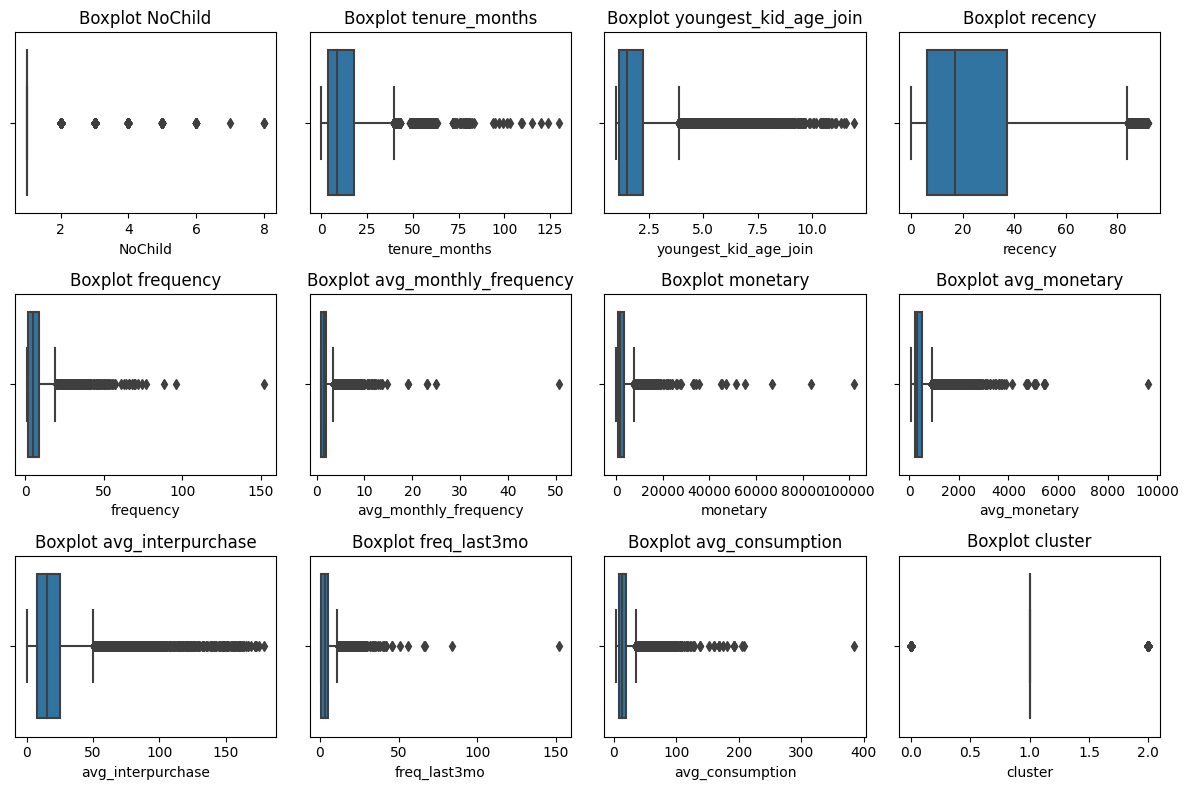

In [90]:
# Membuat Boxplot Dari Setiap Kolom
columns_to_plot = dataset_cluster.columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=dataset_cluster[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

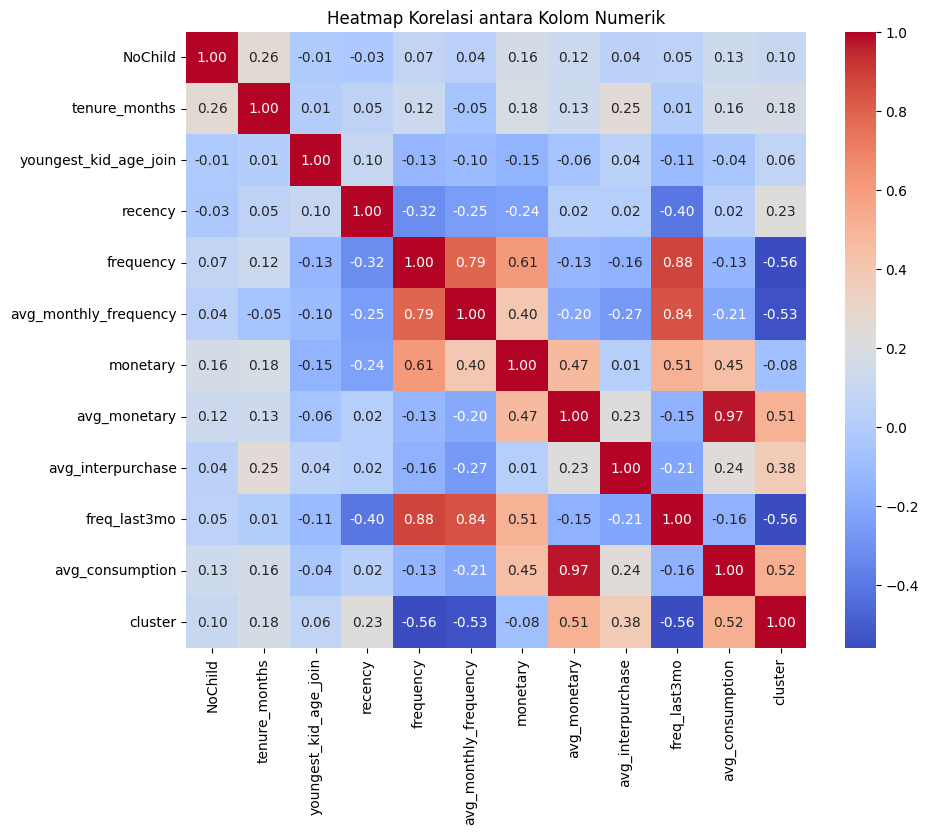

In [87]:
# Membuat matriks korelasi antar kolom
correlation_matrix = dataset_cluster.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Kolom Numerik')
plt.show()

**StandardScaler**:

Mengubah data menjadi distribusi standar dengan mean=0 dan deviasi standar=1. Cocok untuk **algoritma clustering** yang rentan terhadap skala data, seperti **K-Means**, Hierarchical Clustering, dan Gaussian Mixture Models (GMM).

In [57]:
# Melakukan Standarisasi atau Normalisas Data 
ss = StandardScaler()
scaled_dataset = ss.fit_transform(dataset_cluster)

In [58]:
scaled_dataset

array([[ 3.36533338,  2.55096288,  0.84095583, ..., -0.3097646 ,
         0.0210737 ,  0.48127007],
       [-0.38503139,  1.36485858, -0.65328911, ...,  1.3709298 ,
        -0.80036921, -0.2035835 ],
       [-0.38503139,  1.31002651, -0.72915078, ...,  1.33133228,
        -0.52655491,  4.26080572],
       ...,
       [-0.38503139, -0.58600882, -0.73834613, ..., -0.60428727,
         1.66395951, -0.54898274],
       [-0.38503139, -0.58023702,  0.539808  , ..., -0.160174  ,
        -0.25274061, -0.05377178],
       [-0.38503139, -0.58023702, -0.74754149, ...,  0.13397895,
        -0.25274061,  0.93873086]])

### Clustering K-Means

Menentukan Jumlah Cluster Optimal (Metode Elbow)

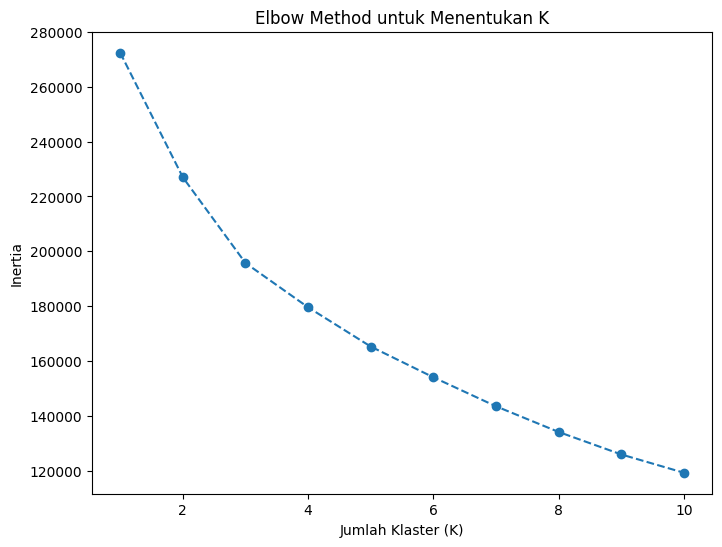

In [70]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_dataset)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K')

plt.show()

In [60]:
# Menentukan nilai K yang optimal berdasarkan grafik elbow
optimal_k_elbow = 3 
print(f'Nilai K Optimal berdasarkan grafik elbow yaitu {optimal_k_elbow}')

Nilai K Optimal berdasarkan grafik elbow yaitu 3


Menentukan Jumlah Cluster Optimal (Metode Silhoutte)

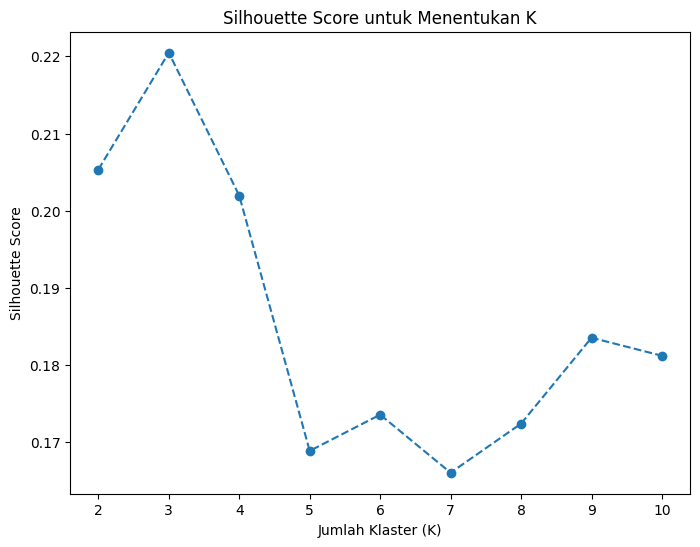

In [71]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_dataset)
    silhouette_avg = silhouette_score(scaled_dataset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K')
plt.show()

In [62]:
# Menentukan nilai K yang optimal berdasarkan nilai Silhouette tertinggi
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena mulai dari K=2
print(f'Nilai K yang optimal berdasarkan nilai Silhouette tertinggi yaitu {optimal_k_silhouette}')

Nilai K yang optimal berdasarkan nilai Silhouette tertinggi yaitu 3


Melakukan Clustering menggunakan K-Means

In [123]:
kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=42, n_init=100)
dataset_cluster.loc[:, 'cluster'] = kmeans.fit_predict(scaled_dataset)
dataset_cluster

,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption,cluster
0,3,41.232033,2.921287,47.576389,7,1.750000,4335,619.285714,13.166667,4,23.142857,2
1,1,27.728953,1.141684,84.400000,3,1.000000,962,320.666667,45.000000,1,14.000000,1
2,1,27.104723,1.051335,0.460417,5,1.666667,9462,1892.400000,44.250000,2,73.600000,2
3,2,48.985626,1.916496,14.079167,11,1.833333,4224,384.000000,15.000000,6,16.000000,0
4,1,36.106776,2.989733,16.530556,3,1.000000,541,180.333333,83.000000,1,9.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24760,1,5.585216,2.447639,9.472222,10,1.666667,2438,243.800000,17.222222,6,8.800000,1
24761,1,5.585216,2.086242,0.354861,12,2.000000,5259,438.250000,14.909091,7,15.833333,0
24762,1,5.519507,1.040383,14.548611,18,3.600000,4938,274.333333,7.588235,10,9.388889,0
24763,1,5.585216,2.562628,59.552083,7,1.400000,3332,476.000000,16.000000,3,16.000000,1


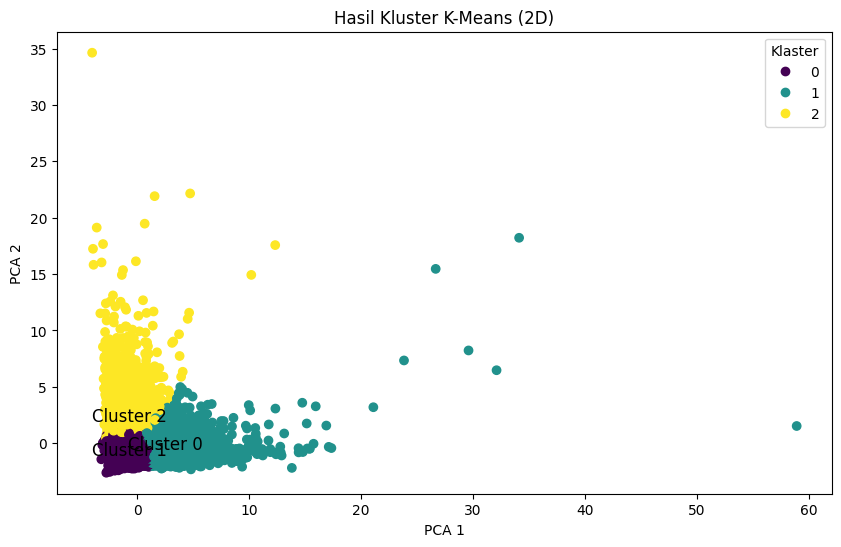

In [136]:
# Visualisasi 2D Hasil Clustering K-Means
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_dataset)
cluster_df = pd.DataFrame(data={'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'Cluster': dataset_cluster['cluster']})

cluster_counts = dataset_cluster['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

cluster_order = cluster_counts.sort_values(by='Count', ascending=False)['Cluster'].values

cluster_color_mapping = {cluster: i for i, cluster in enumerate(cluster_order)}
cluster_df['Cluster'] = cluster_df['Cluster'].map(cluster_color_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(cluster_df['PCA1'], cluster_df['PCA2'], c=cluster_df['Cluster'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Kluster K-Means (2D)')
plt.legend(*scatter.legend_elements(), title='Klaster')

for cluster, color_index in cluster_color_mapping.items():
    plt.text(cluster_df[cluster_df['Cluster'] == color_index]['PCA1'].mean(), cluster_df[cluster_df['Cluster'] == color_index]['PCA2'].mean(), f'Cluster {cluster}', fontsize=12, ha='center', va='center')

plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18288\639612993.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(cluster_color_mapping))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18288\639612993.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


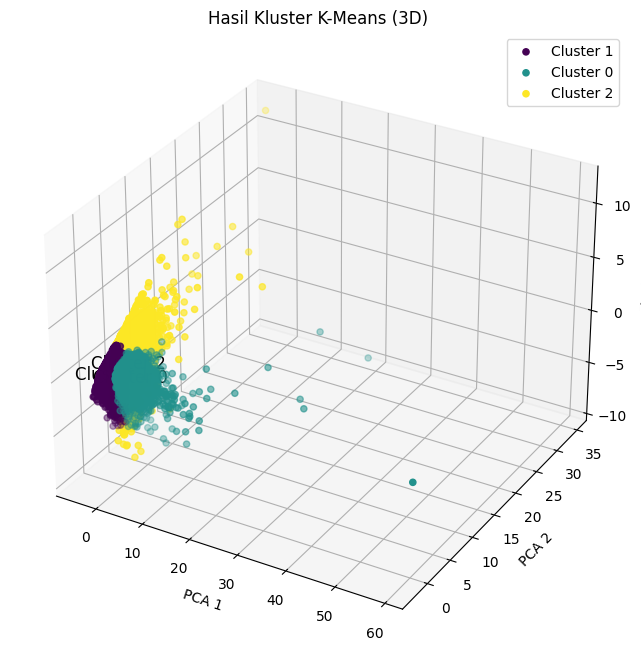

In [135]:
# Visualisasi 3D Hasil Clustering K-Means
pca = PCA(n_components=3) 
pca_result = pca.fit_transform(scaled_dataset)
cluster_df = pd.DataFrame(data={'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'PCA3': pca_result[:, 2], 'Cluster': dataset_cluster['cluster']})

cluster_counts = dataset_cluster['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

cluster_order = cluster_counts.sort_values(by='Count', ascending=False)['Cluster'].values

cluster_color_mapping = {cluster: i for i, cluster in enumerate(cluster_order)}
cluster_df['Cluster'] = cluster_df['Cluster'].map(cluster_color_mapping)

colormap = plt.cm.get_cmap('viridis', len(cluster_color_mapping))
colors = [colormap(cluster_color_mapping[cluster]) for cluster in cluster_df['Cluster']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster, color_index in cluster_color_mapping.items():
    cluster_data = cluster_df[cluster_df['Cluster'] == color_index]
    ax.scatter(
        cluster_data['PCA1'],
        cluster_data['PCA2'],
        cluster_data['PCA3'],
        label=f'Cluster {cluster}',
        c=[colormap(color_index)] * len(cluster_data),  
        cmap='viridis'
    )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Cluster')
ax.set_title('Hasil Kluster K-Means (3D)')
ax.legend()

for cluster, color_index in cluster_color_mapping.items():
    cluster_data = cluster_df[cluster_df['Cluster'] == color_index]
    x_mean = cluster_data['PCA1'].mean()
    y_mean = cluster_data['PCA2'].mean()
    z_mean = cluster_data['PCA3'].mean()
    ax.text(x_mean, y_mean, z_mean, f'Cluster {cluster}', fontsize=12, ha='center', va='center')

plt.show()


### Profiling Hasil Cluster

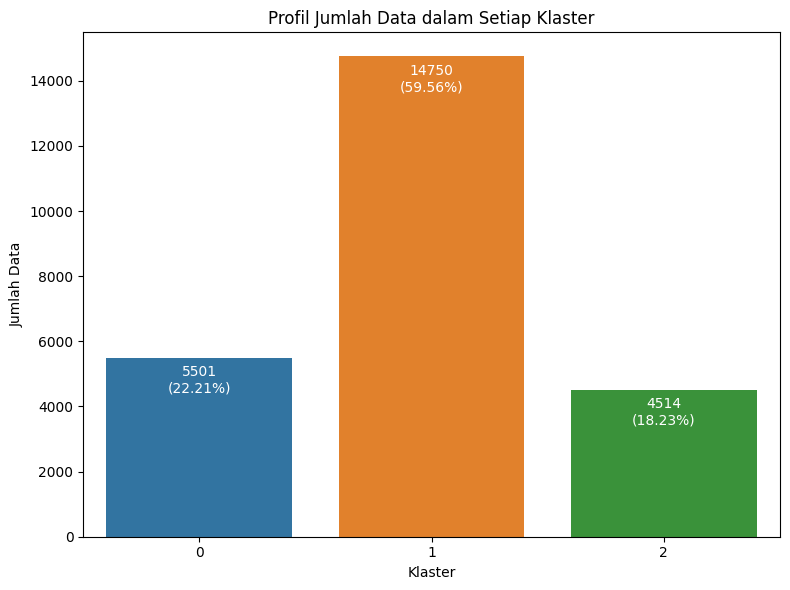

In [115]:
# Membuat grafik perbandingan klaster
cluster_counts = dataset_cluster['cluster'].value_counts().sort_index()
total_data = len(dataset_cluster)
percentage_values = (cluster_counts / total_data) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Profil Jumlah Data dalam Setiap Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Data')

for index, (count, percentage) in enumerate(zip(cluster_counts.values, percentage_values)):
    ax.text(index, count - 700, f'{count}\n({percentage:.2f}%)', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


Profil klaster berdasarkan Mean

In [126]:
cluster_profile = dataset_cluster.groupby('cluster').mean()
cluster_profile

,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption
cluster,,,,,,,,,,,
0,1.243047,12.600566,1.618632,10.339388,14.977277,3.095801,4503.226504,316.954514,10.871588,8.661516,12.419201
1,1.117763,9.760135,2.063673,30.990404,4.113153,1.495381,1292.142508,310.851311,17.481762,2.560271,12.457527
2,1.445503,19.634255,1.816327,26.316495,4.916925,1.312321,4221.872840,916.638077,34.052102,2.601462,35.877539


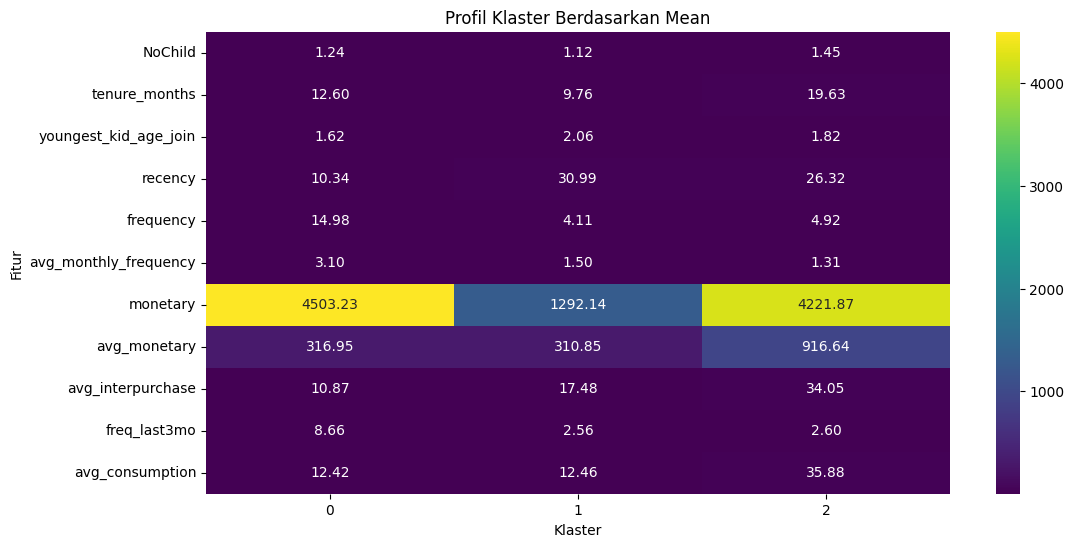

In [127]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='viridis', fmt='.2f')
plt.title('Profil Klaster Berdasarkan Mean')
plt.xlabel('Klaster')
plt.ylabel('Fitur')
plt.show()

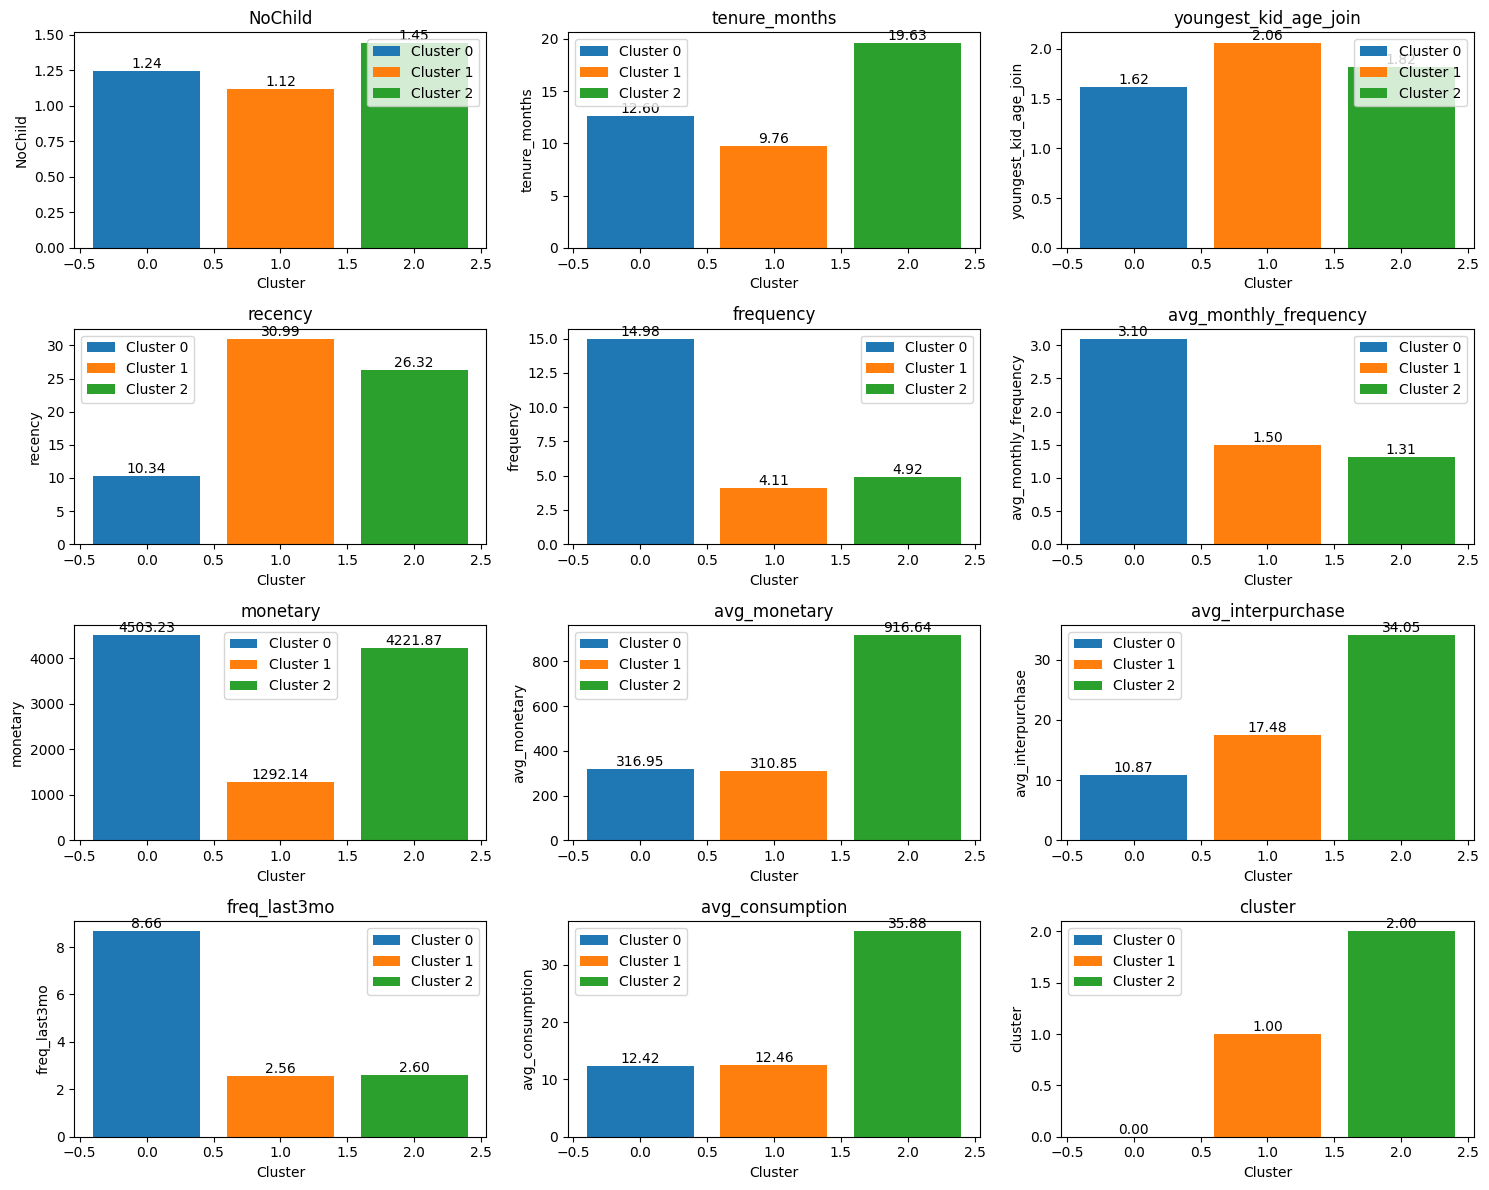

In [128]:
columns_to_plot = dataset_cluster.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_index = i % 3   
    ax = axes[row, col_index]
    for cluster in cluster_profile.index:
        cluster_data = dataset_cluster[dataset_cluster['cluster'] == cluster]
        mean_value = cluster_data[col].mean()  
        total_count = cluster_data.shape[0]     
        ax.bar(cluster, mean_value, label=f'Cluster {cluster}')
        ax.text(cluster, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)
    ax.set_title(col)
    ax.legend()

# Remove empty subplots
for i in range(len(columns_to_plot), 12):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Profil klaster berdasarkan Median

In [129]:
cluster_profile = dataset_cluster.groupby('cluster').median()
cluster_profile

,NoChild,tenure_months,youngest_kid_age_join,recency,frequency,avg_monthly_frequency,monetary,avg_monetary,avg_interpurchase,freq_last3mo,avg_consumption
cluster,,,,,,,,,,,
0,1.0,9.494867,1.319644,6.426389,13.0,2.666667,4084.0,289.928571,10.785714,8.0,11.666667
1,1.0,5.683778,1.601643,24.211111,4.0,1.333333,1002.5,282.250000,15.875000,2.0,11.666667
2,1.0,17.297741,1.445585,20.572917,5.0,1.200000,3720.5,804.000000,28.000000,2.0,32.000000


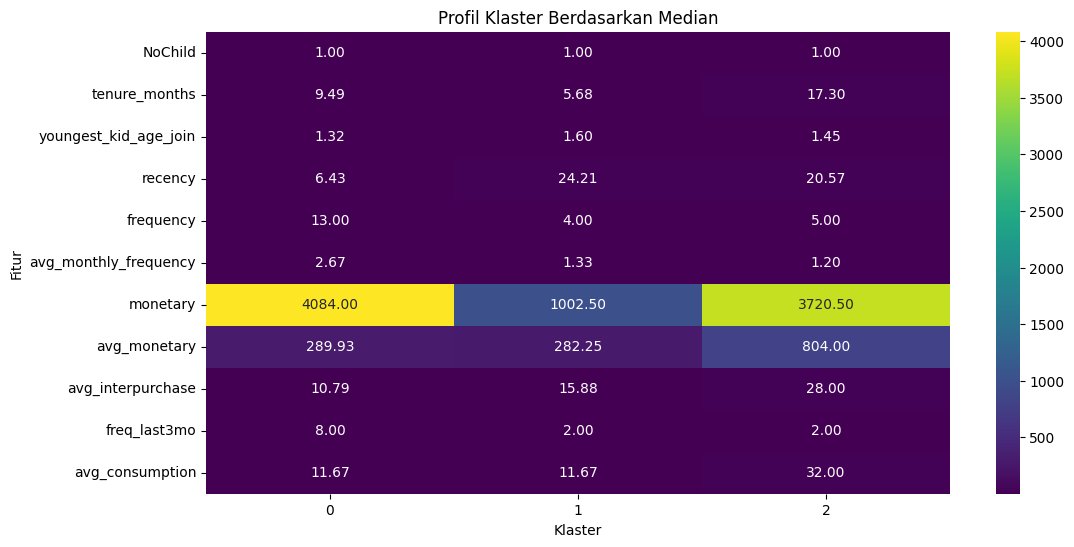

In [130]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='viridis', fmt='.2f')
plt.title('Profil Klaster Berdasarkan Median')
plt.xlabel('Klaster')
plt.ylabel('Fitur')
plt.show()

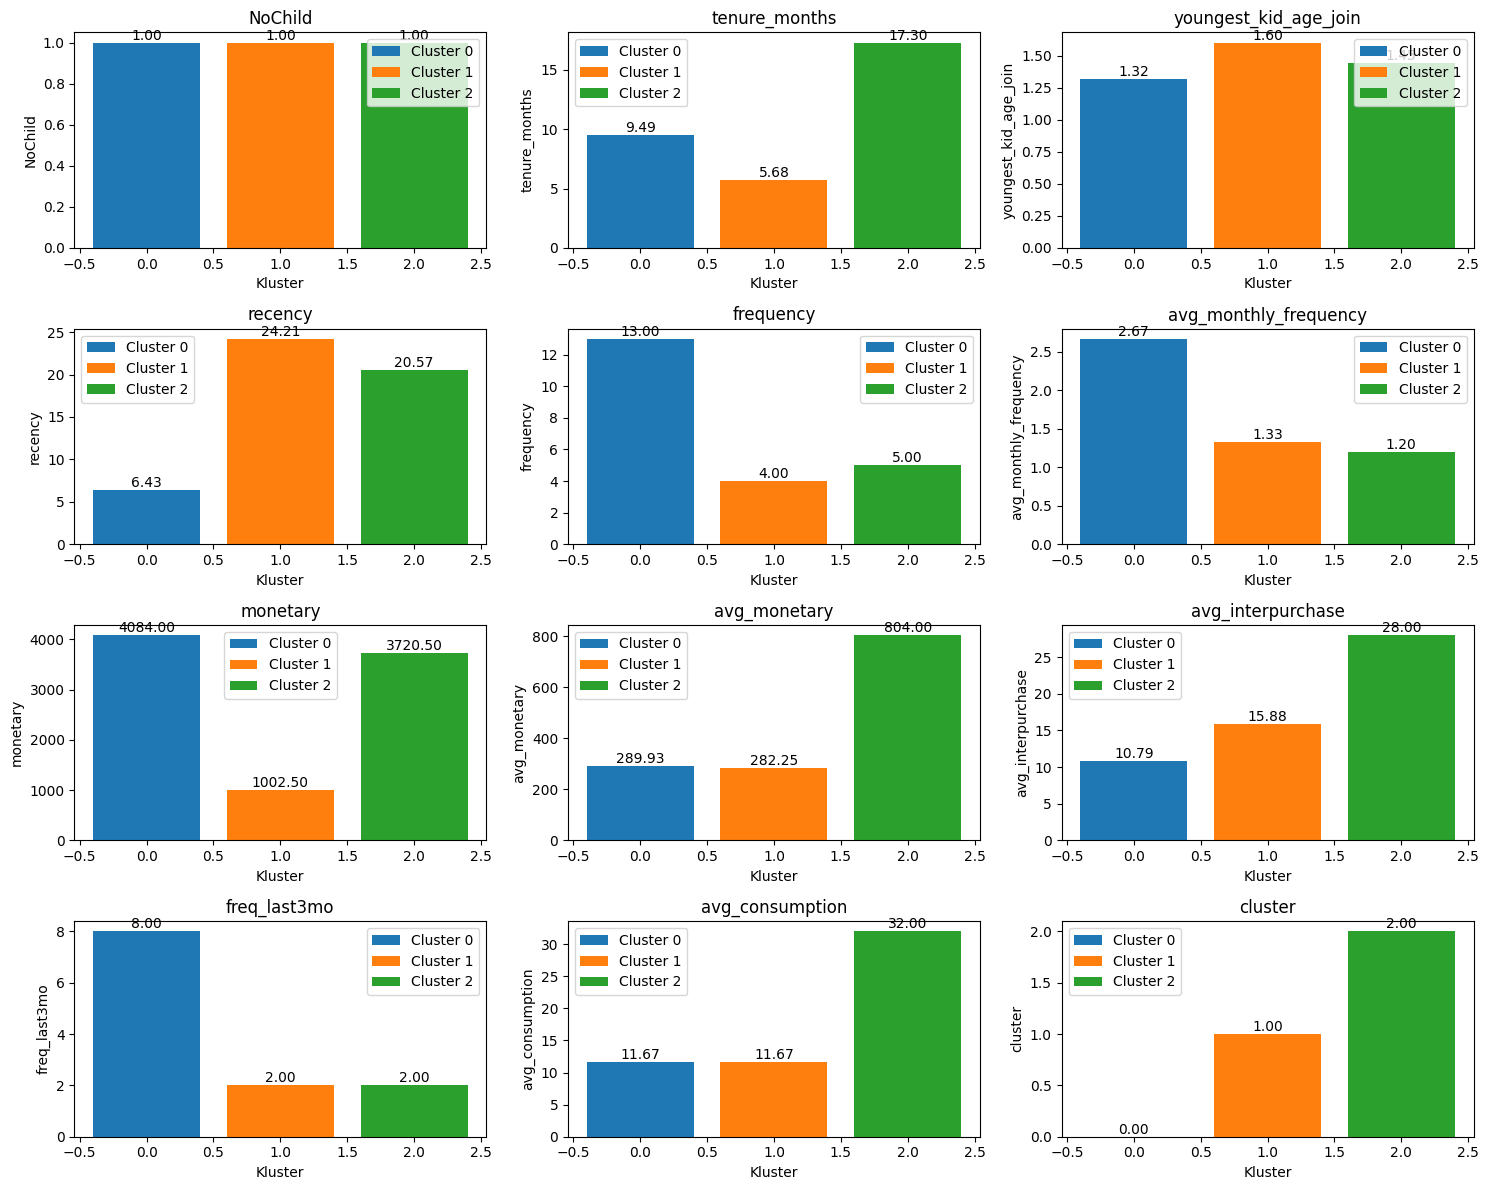

In [134]:
# Membuat grafik perbandingan klaster
columns_to_plot = dataset_cluster.columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_index = i % 3   
    ax = axes[row, col_index]
    for cluster in cluster_profile.index:
        cluster_data = dataset_cluster[dataset_cluster['cluster'] == cluster]
        median_value = cluster_data[col].median()  
        total_count = cluster_data.shape[0]     
        ax.bar(cluster, median_value, label=f'Cluster {cluster}')
        ax.text(cluster, median_value, f'{median_value:.2f}', ha='center', va='bottom')
    ax.set_xlabel('Kluster')
    ax.set_ylabel(col)
    ax.set_title(col)
    ax.legend()

# Menghapus subplots kosong
for i in range(len(columns_to_plot), 12):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


## Kesimpulan

Berdasarkan hasil analisis clustering pada Customer Segmentation, dapat diidentifikasi tiga kluster utama dengan karakteristik yang berbeda. Berikut adalah kesimpulan singkat dari setiap kluster:

**Kluster 0: "Aktif"**

- Rata-rata memiliki sekitar 1 anak (jumlah anak yang sedikit).
- Lama berlangganan relatif sedang, sekitar 12 bulan.
- Umur anak termuda yang bergabung juga cenderung muda.
- Frekuensi belanja cukup tinggi.
- Rata-rata pengeluaran bulanan cukup tinggi.
- Interpurchase interval (waktu antara pembelian) cenderung pendek.

**Kluster 1: "Pasif"**

- Rata-rata memiliki sekitar 1 anak (jumlah anak yang sedikit).
- Lama berlangganan relatif pendek, sekitar 9 bulan.
- Umur anak termuda yang bergabung lebih tinggi.
- Tingkat recency (seberapa baru terakhir kali berbelanja) tinggi, mungkin terdapat periode ketidakaktifan.
- Frekuensi belanja rendah.
- Rata-rata pengeluaran bulanan lebih rendah dibandingkan kluster lain.
- Interpurchase interval lebih tinggi, cenderung jarang berbelanja.

**Kluster 2: "Setia"**

- Rata-rata memiliki sekitar 1 anak (jumlah anak yang sedikit).
- Lama berlangganan relatif panjang, sekitar 19 bulan.
- Umur anak termuda yang bergabung cenderung muda.
- Tingkat recency tinggi, mungkin merupakan pelanggan setia.
- Frekuensi belanja sedang.
- Rata-rata pengeluaran bulanan tinggi.
- Interpurchase interval pendek.

Rekomendasi strategi CRM dapat diambil berdasarkan karakteristik masing-masing kluster. Untuk kluster 0, fokus pada mempertahankan frekuensi belanja yang tinggi. Kluster 1 memerlukan usaha untuk mengaktifkan kembali pelanggan yang mungkin mengalami periode ketidakaktifan. Sementara itu, kluster 2 adalah pelanggan setia yang dapat diberikan penghargaan atas loyalitas mereka.